In [1]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

In [2]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-evals")

# Placeholder for confusion matrix values
rtn_mses, rtn_ppls, rtn_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        rtn_mses.append(mse)
        rtn_ppls.append(ppl)
        rtn_bitwidhts.append(bitwidht)
        
rtn_mses = np.asarray(rtn_mses)
rtn_ppls = np.asarray(rtn_ppls)
rtn_bitwidhts = np.asarray(rtn_bitwidhts)

In [3]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-gptq")

# Placeholder for confusion matrix values
gptq_mses, gptq_ppls, gptq_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        gptq_mses.append(mse)
        gptq_ppls.append(ppl)
        gptq_bitwidhts.append(bitwidht)
        
gptq_mses = np.asarray(gptq_mses)
gptq_ppls = np.asarray(gptq_ppls)
gptq_bitwidhts = np.asarray(gptq_bitwidhts)

In [4]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_GALQIWI")

# Placeholder for confusion matrix values
noisy_mses, noisy_ppls = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name == MODEL.split("/")[-1]:
        noisy_mses.append(float(mse))
        noisy_ppls.append(float(ppl))

noisy_mses = np.asarray(noisy_mses)
noisy_ppls = np.asarray(noisy_ppls)

Text(0.5, 1.0, 'meta-llama/Meta-Llama-3.1-8B')

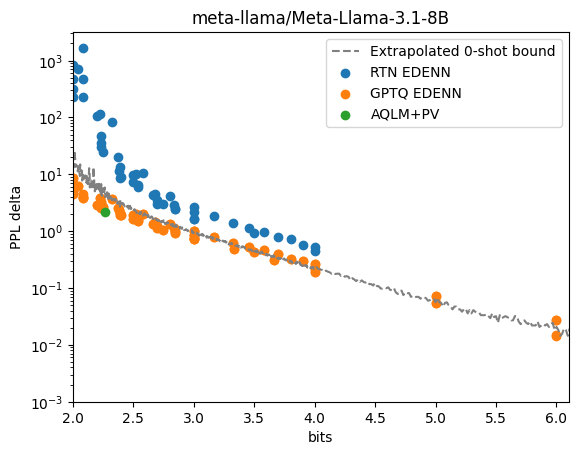

In [5]:
import matplotlib.pyplot as plt
import numpy as np


noisy_bitwidhts = - np.log2(noisy_mses) / 2
noisy_bitwidhts_order = np.argsort(noisy_bitwidhts)
plt.plot(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", linestyle="--", label="Extrapolated 0-shot bound",
)


plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    label="RTN EDENN",
)

plt.scatter(
    gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls),
    label="GPTQ EDENN",
)

if MODEL == "meta-llama/Meta-Llama-3.1-8B":
    plt.scatter(
        [2.27], [7.75 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
elif MODEL == "meta-llama/Llama-2-7b-hf":
    plt.scatter(
        [2.02, 2.29], [5.84 - np.min(rtn_ppls), 5.678532600402832 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
    plt.scatter(
        [2.02, 2.29, 3.04, 4.04], [6.688191890716553 - np.min(rtn_ppls), 5.922969818115234 - np.min(rtn_ppls), 5.46 - np.min(rtn_ppls), 5.21 - np.min(rtn_ppls)],
        label="AQLM",
    )
    plt.scatter(
        [2.00, 3.00, 4.00], [5.91 - np.min(rtn_ppls), 5.29 - np.min(rtn_ppls), 5.17 - np.min(rtn_ppls)],
        label="QTIP",
    )

plt.yscale("log")
plt.xlim(2, 6.1)
plt.ylim(10**-3, 10**3.5)

plt.xlabel("bits")
plt.ylabel("PPL delta")
plt.legend()
plt.title(MODEL)

In [6]:
print(np.min(rtn_ppls))

5.606886386871338


In [7]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

import wandb
import numpy as np
from tqdm.auto import tqdm

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_ONE_LAYER_GALQIWI_PPL")

# Placeholder for confusion matrix values
mses, ppls, bitwidhts, block_ids = [], [], [], []

# Iterate over runs and extract confusion matrix data
for run in tqdm(project_runs):
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.config.get("base_model")
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    bitwidht = run.summary.get("effective_wbits")
    block_id = run.config.get("layer_idx")
    
    # print(f"{model=} {block_id=} {mse=} {ppl=}")
    if mse is not None and ppl is not None:
        mses.append(mse)
        ppls.append(ppl)
        bitwidhts.append(bitwidht)
        block_ids.append(block_id)
        
mses = np.asarray(mses)
ppls = np.asarray(ppls)
bitwidhts = np.asarray(bitwidhts)
block_ids = np.asarray(block_ids)

order = np.argsort(mses)
mses = mses[order]
ppls = ppls[order]
bitwidhts = bitwidhts[order]
block_ids = block_ids[order]

  0%|          | 0/9305 [00:00<?, ?it/s]

/tmp/ipykernel_1371959/3110933079.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slopes[block_id] = slope


Text(0, 0.5, 'PPL Gap')

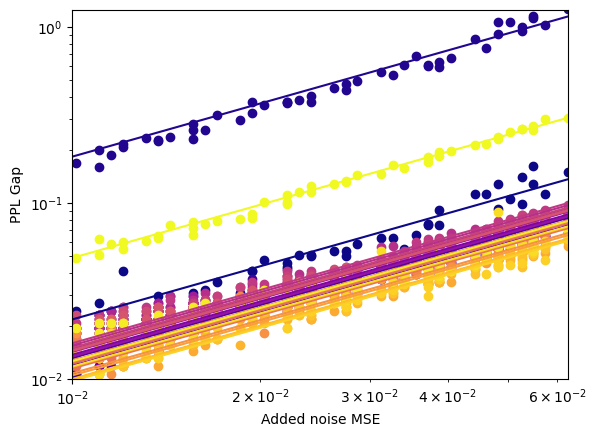

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

slopes = np.empty((32,))
intercept = np.min(rtn_ppls)

cmap = mpl.colormaps["plasma"]

for block_id in range(32):
    this_layer_pos = (block_ids == block_id)
    
    plt.scatter(
        mses[this_layer_pos],
        ppls[this_layer_pos] - intercept,
        label=f"{block_id}",
        color=cmap(block_id/31),
    )
    
    this_layer_pos = (block_ids == block_id) & (mses <= 4**(-2))
    
    slope, _, _, _ = np.linalg.lstsq(mses[this_layer_pos][:, None], ppls[this_layer_pos] - intercept, rcond=None)
    
    plt.plot(
        np.linspace(0, 4**(-2)),
        slope * np.linspace(0, 4**(-2)),
        color=cmap(block_id/31),
        # linestyle=(0, (1, 5)),
    )
    slopes[block_id] = slope

    # plt.yscale("log")

plt.xlim(0.01, 4**(-2))
plt.ylim(0.01, 1.25)

plt.yscale("log")
plt.xscale("log")

plt.xlabel("Added noise MSE")
plt.ylabel("PPL Gap")

Text(0.5, 1.0, 'Optimal block-wise BPW, meta-llama/Meta-Llama-3.1-8B')

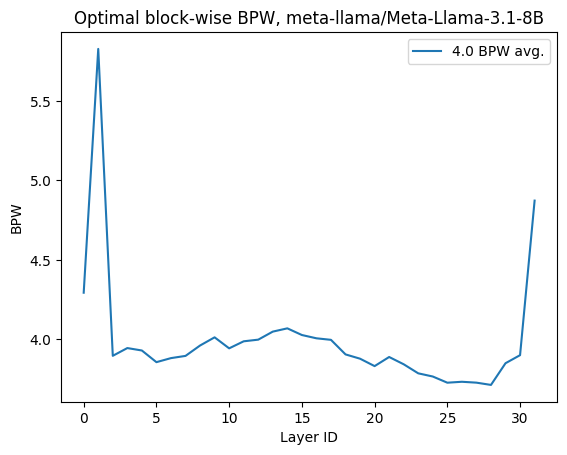

In [9]:
from scipy.optimize import minimize


def get_optimal_blockwise_bitwidths(slopes, budget):
    bitwidhts = np.log2(slopes) / 2
    return bitwidhts - bitwidhts.mean() + budget


def expected_ppl_gap(slopes, allocated_bitwidths):
    return np.sum(slopes * np.power(4, -allocated_bitwidths))

for budget in (4.0,):
    plt.plot(get_optimal_blockwise_bitwidths(slopes, budget), label=f"{budget} BPW avg.")
    
plt.xlabel("Layer ID")
plt.ylabel("BPW")

plt.legend()
plt.title(f"Optimal block-wise BPW, {MODEL}")

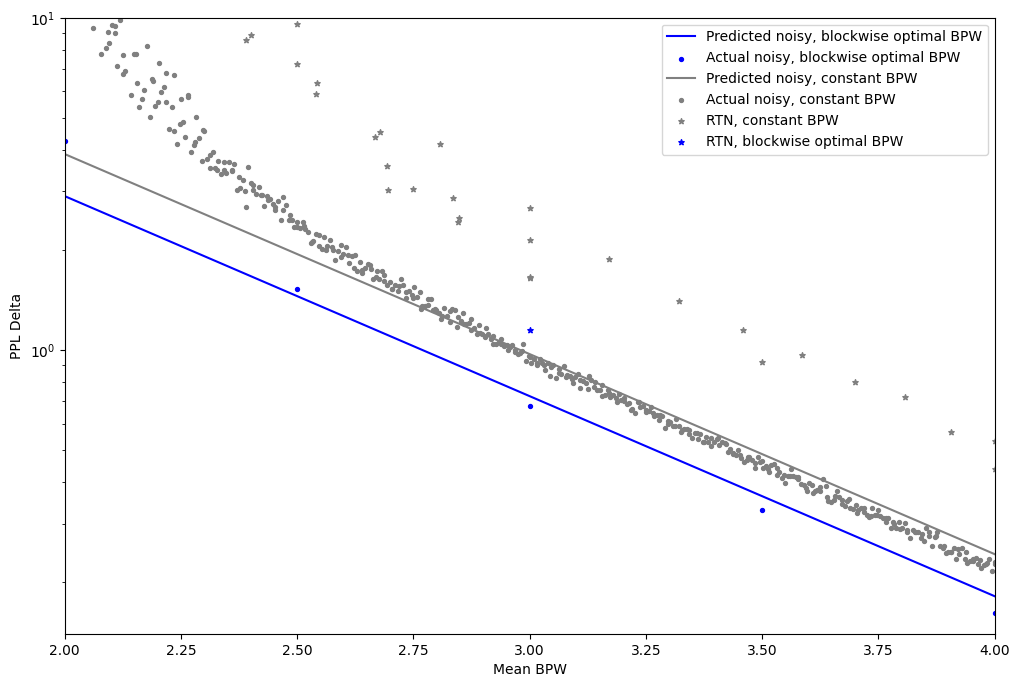

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]

bpws = [2, 2.5, 3, 3.5, 4.0]
actual = [9.854679107666016, 7.133002281188965, 6.286427021026611, 5.935948848724365, 5.768750190734863]
rtn = [None, None, 6.754897594451904, None, None]

# NOISE BLOCKWISE BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 4)],
    color="blue", label="Predicted noisy, blockwise optimal BPW",
)
plt.scatter(bpws, actual  - np.min(rtn_ppls), s=8, color="blue", label="Actual noisy, blockwise optimal BPW")


# NISE CONSTANT BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in np.linspace(2, 4)],
    color="gray", label="Predicted noisy, constant BPW",
)
plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", s=8, label="Actual noisy, constant BPW",
)

# GPTQ
# plt.scatter(
#     gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls), 
#     color="green", marker="*", s=16, label="GPTQ, constant BPW",
# )

# RTN CONSTANT BPW
plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    color="gray", s=16, marker="*", label="RTN, constant BPW",
)

# RTN OPTIMAL BPW
plt.scatter(
    [3.0], 6.754897594451904 - np.min(rtn_ppls),
    color="blue", s=16, marker="*", label="RTN, blockwise optimal BPW",
)

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.yscale("log")
plt.xlim(2, 4)
plt.ylim(0.14, 10)

plt.legend()

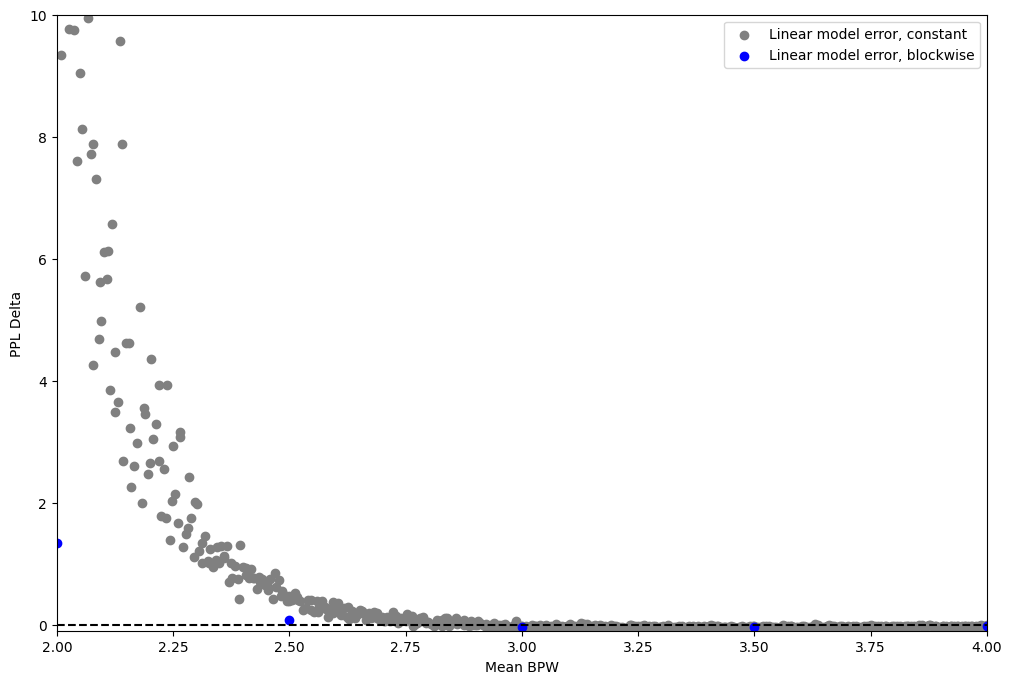

In [11]:
linear_model_constant_ppls = np.asarray([expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in noisy_bitwidhts[noisy_bitwidhts_order]])

plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], (noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls)) - linear_model_constant_ppls,
    color="gray", label="Linear model error, constant",
)
plt.scatter(
    bpws, (actual - np.min(rtn_ppls)) - np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in bpws]),
    color="blue", label="Linear model error, blockwise",
)
plt.axhline(0, color="black", linestyle="--")

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.xlim(2, 4)
plt.ylim(-0.1, 10)

plt.legend()

In [12]:
import math
from os import listdir
from os.path import isfile, join

for i in range(16):
    assert int(math.log2(2**i)) == i

grids_path = "../grids"
grids = [f for f in listdir(grids_path) if isfile(join(grids_path, f))]

good_grids = []

for grid in sorted(grids):
    grid_signature = grid[4:-3].split("-")
    edenn_d = int(grid_signature[0])
    edenn_n = int(grid_signature[1])
    
    # print(f"{edenn_d} {edenn_n}:", end=" ")
    if edenn_n & (edenn_n-1) != 0:
        # print(f"not power of 2")
        continue
    
    if edenn_n * edenn_d * 2 > 64 * 1024:
        # print(f"too large")
        continue
    
    # print("good")
    good_grids.append((edenn_d, edenn_n))

In [13]:
%env CUDA_VISIBLE_DEVICES=6

import torch
from edenn import higgs_quantize_dequantize

@torch.no_grad()
def eval_grid(edenn_d: int, edenn_n: int):
    x = torch.empty((2**18, edenn_d), device="cuda").normal_()
    dequant, entropy = higgs_quantize_dequantize(x, edenn_d, edenn_n)
    mse = (x - dequant).pow(2).mean().item()
    return mse, entropy / edenn_d

good_grids_with_mse = []
for (edenn_d, edenn_n) in good_grids:
    mse, entropy = eval_grid(edenn_d, edenn_n)
    good_grids_with_mse.append({
            "name": f"edenn_{edenn_d}_{edenn_n}",
            "mse": mse, "bits": math.log2(edenn_n) / edenn_d,
            "edenn_d": edenn_d, "edenn_n": edenn_n, "entropy": entropy
    })

env: CUDA_VISIBLE_DEVICES=6


In [14]:
from e8p2 import QUIP_SHARP_QUANTIZER_2
from e8p3 import QUIP_SHARP_QUANTIZER_3
from e8p4 import QUIP_SHARP_QUANTIZER_4

with torch.no_grad():
    x = torch.empty((2**18, 8), device="cuda").normal_()
    dequant = QUIP_SHARP_QUANTIZER_2.quantize(x, return_idx=False)
    quip_sharp_2_mse = (x - dequant).pow(2).mean().item()
    
    dequant = QUIP_SHARP_QUANTIZER_3.quantize(x, return_idx=False)
    quip_sharp_3_mse = (x - dequant).pow(2).mean().item()
    
    dequant = QUIP_SHARP_QUANTIZER_4.quantize(x, return_idx=False)
    quip_sharp_4_mse = (x - dequant).pow(2).mean().item()
    
    quip_sharp_grids = [
        {"name": "quipsharp_2", "mse": quip_sharp_2_mse, "bits": 2},
        {"name": "quipsharp_3", "mse": quip_sharp_3_mse, "bits": 3},
        {"name": "quipsharp_4", "mse": quip_sharp_4_mse, "bits": 4},
    ]

In [15]:
bnb_grids = [
    {"name": "int8", "mse": 0.0001688, "bits": 8 + 16 / 4096},
    {"name": "nf4", "mse": 0.008422, "bits": 4 + 16 / 64},
    # {"name": "fp16", "mse": 0.0, "bits": 16},
]

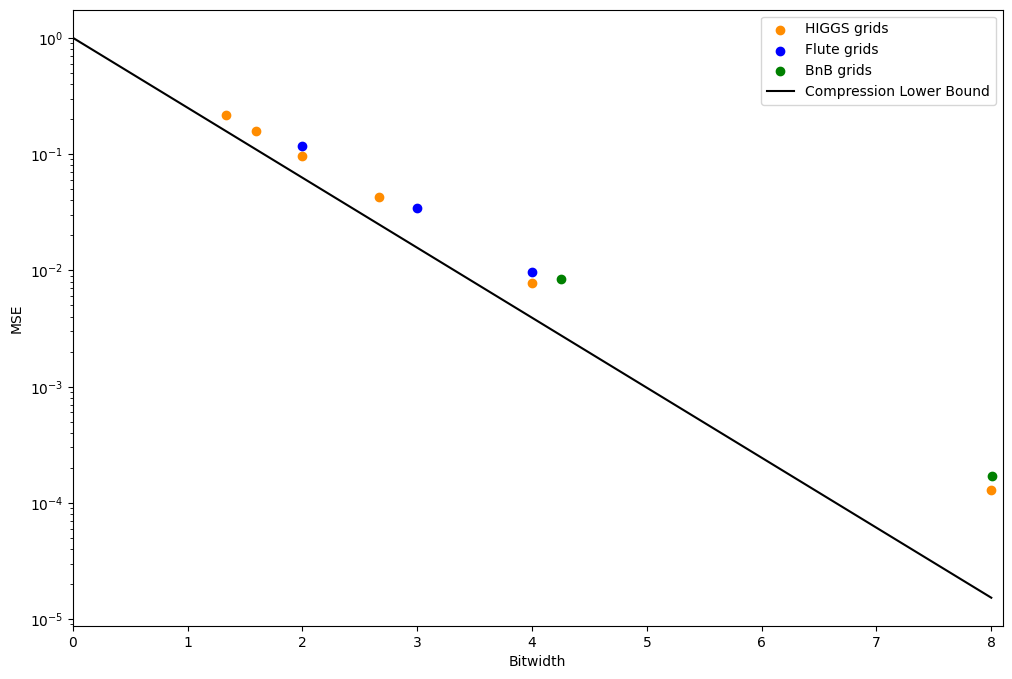

In [16]:
import numpy as np
import matplotlib.pyplot as plt

higgs_grids = [grid for grid in good_grids_with_mse if grid['edenn_n'] == 256 and grid['bits'] >= 1.3]
flute_grids = [grid for grid in good_grids_with_mse if grid["edenn_n"] in [4, 8, 16] and grid["edenn_d"] == 1]
combo_grids = flute_grids + bnb_grids # + quip_sharp_grids

# plt.scatter([v["bits"] for v in good_grids_with_mse], [v["mse"] for v in good_grids_with_mse], label="All grids")
plt.scatter([v["bits"] for v in higgs_grids], [v["mse"] for v in higgs_grids], color="darkorange", label="HIGGS grids")
plt.scatter([v["bits"] for v in flute_grids], [v["mse"] for v in flute_grids], color="blue", label="Flute grids")
# plt.scatter([v["bits"] for v in quip_sharp_grids], [v["mse"] for v in quip_sharp_grids], label="QuIP# grids")
plt.scatter([v["bits"] for v in bnb_grids], [v["mse"] for v in bnb_grids], color="green", label="BnB grids")

plt.plot(np.linspace(0, 8), np.power(4, -np.linspace(0, 8)), color="black", label="Compression Lower Bound")

plt.xlabel("Bitwidth")
plt.ylabel("MSE")

plt.yscale("log")
plt.xlim(0, 8.1)

plt.legend()

In [17]:
from ortools.linear_solver import pywraplp

def find_grids_with_budget(
    slopes,    # linear coefficients for [layerwise mse -> metric]
    weights,   # linear coefficients for [layer bitwidth -> total bitwidth] (1 / num_blocks for blockwise)
    budget,    # upper bound on total bitwidth
    grid_bits, # available grid bitwidths
    grid_mses  # available grid mses
) -> tuple[float, list]:
    num_layers = len(slopes)
    num_grids = len(grid_bits)
    assert len(grid_mses) == num_grids
    
    solver = pywraplp.Solver.CreateSolver("CP-SAT")

    x = {(j, i) : solver.BoolVar("name") for i in range(num_grids) for j in range(num_layers)}
    
    for j in range(num_layers) : solver.Add(sum(x[(j, i)] for i in range(num_grids)) == 1)
    solver.Add(sum(x[(j, i)] * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids)) <= budget + 1e-5)
    solver.Minimize(sum(x[(j, i)] * slopes[j] * grid_mses[i] for j in range(num_layers) for i in range(num_grids)))

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        avg_bits = sum(x[(j, i)].solution_value() * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids))
        solution = np.asarray([[x[(j, i)].solution_value() for i in range(num_grids)] for j in range(num_layers)])
        indices = np.argwhere(solution == 1.0)
        assert len(indices) == num_layers
        return avg_bits, indices[:,1]
    else:
        raise Exception(f"Didn't solve: {status}")

Processing bitwidths...:   0%|          | 0/40 [00:00<?, ?it/s]

Text(0, 0.5, 'Selected Bitwidht')

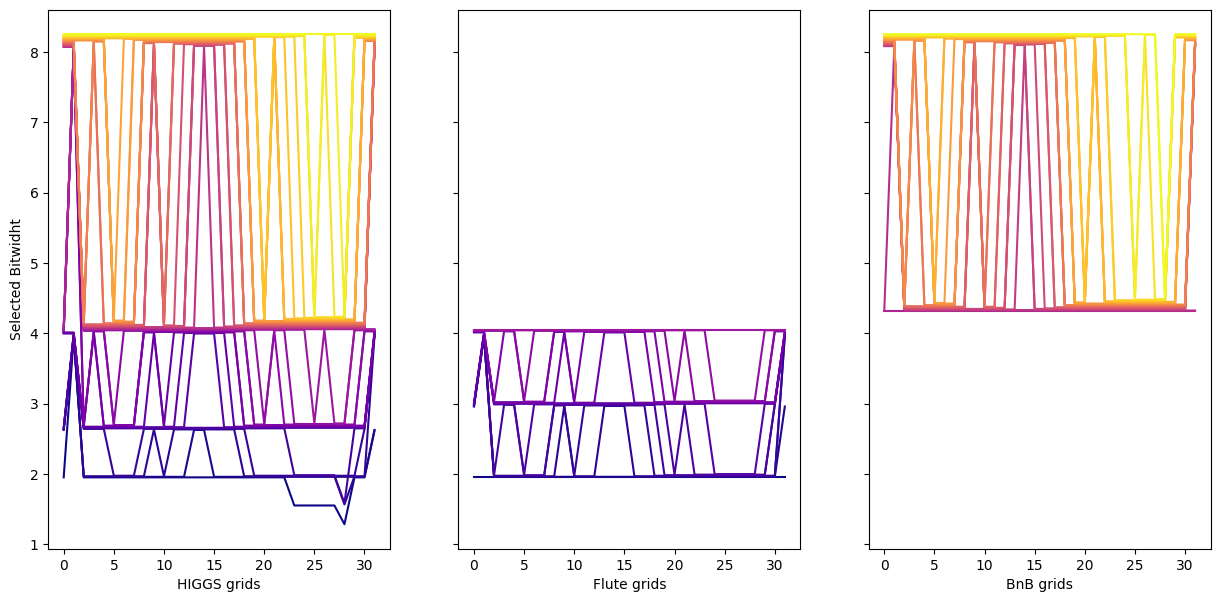

In [18]:
cmap = mpl.colormaps["plasma"]

any_configurations = set()
higgs_configurations = set()
flute_configurations = set()
quip_sharp_configurations = set()
bnb_configurations = set()
combo_configurations = set()

fig, axs = plt.subplots(1, 3, figsize=(15, 7), sharey=True)

for target_bitwidht in tqdm(np.linspace(2.0, 8.0, num=40), desc="Processing bitwidths..."):
    # ANY
    # girds_to_map_to = good_grids_with_mse # any
    # avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    # if tuple(indices) not in any_configurations:
    #     axs[0].plot(
    #         np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
    #         color=cmap((target_bitwidht -  2) / (8 - 2)),
    #         label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
    #     )
    #     any_configurations.add(tuple(indices))
    
    # HIGGS
    girds_to_map_to = higgs_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in higgs_configurations:
        axs[0].plot(
            np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            color=cmap((target_bitwidht -  2) / (8 - 2)),
            label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        )
        higgs_configurations.add(tuple(indices))
        
    # FLUTE
    if target_bitwidht <= 4:
        girds_to_map_to = flute_grids
        avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in flute_configurations:
            axs[1].plot(
                np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
                color=cmap((target_bitwidht -  2) / (8 - 2)),
                label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
            )
            flute_configurations.add(tuple(indices))
        
    # QuIP#
    if target_bitwidht <= 4:
        girds_to_map_to = quip_sharp_grids
        avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in quip_sharp_configurations:
            # axs[3].plot(
            #     np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
            #     color=cmap((target_bitwidht -  2) / (8 - 2)),
            #     label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
            # )
            quip_sharp_configurations.add(tuple(indices))
    
    # BnB
    if target_bitwidht >= 4.25:
        girds_to_map_to = bnb_grids
        avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in bnb_configurations:
            axs[2].plot(
                np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
                color=cmap((target_bitwidht -  2) / (8 - 2)),
                label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
            )
            bnb_configurations.add(tuple(indices))
    
    # FLUTE + bnb
    girds_to_map_to = combo_grids
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in combo_configurations:
        # axs[4].plot(
        #     np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
        #     color=cmap((target_bitwidht -  2) / (8 - 2)),
        #     label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
        # )
        combo_configurations.add(tuple(indices))

axs[0].set_xlabel("HIGGS grids")
axs[1].set_xlabel("Flute grids")
axs[2].set_xlabel("BnB grids")
axs[0].set_ylabel("Selected Bitwidht")

In [19]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/higgs-evals")

# Placeholder for confusion matrix values
higgs_ppls, higgs_blockwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    higgs_config = run.config.get("blockwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and higgs_config is not None and model == MODEL:
        higgs_ppls.append(ppl)
        higgs_blockwise_configs.append(higgs_config)
        
higgs_ppls = np.asarray(higgs_ppls)
higgs_blockwise_configs = np.asarray(higgs_blockwise_configs)

higgs_bitwisths = (np.log2(higgs_blockwise_configs[:,:,1]) / higgs_blockwise_configs[:,:,0]).mean(axis=-1)

measured_higgs_configs = set()

for measured_config in higgs_blockwise_configs:
    mapped_config = []
    for block in measured_config:
        for i, grid in enumerate(higgs_grids):
            if grid["edenn_d"] == int(block[0]) and grid["edenn_n"] == int(block[1]):
                mapped_config.append(i)
                break
        else:
            raise Exception(f"Coudn't map grid {block}!")
        
    measured_higgs_configs.add(tuple(mapped_config))


In [20]:
def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/bnb-evals")

# Placeholder for confusion matrix values
bnb_ppls, bnb_blockwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    bnb_config = run.config.get("blockwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and bnb_config is not None and model == MODEL:
        bnb_ppls.append(ppl)
        bnb_blockwise_configs.append(bnb_config)
        
bnb_ppls = np.asarray(bnb_ppls)
bnb_bitwidths = []

bnb_blockwise_configs = np.asarray(bnb_blockwise_configs)

measured_bnb_configs = set()

for measured_config in bnb_blockwise_configs:
    mapped_config = []
    for block in measured_config:
        for i, grid in enumerate(bnb_grids):
            if grid["name"] == block:
                mapped_config.append(i)
                break
        else:
            raise Exception(f"Coudn't map grid {block}!")
        
    measured_bnb_configs.add(tuple(mapped_config))
    bnb_bitwidths.append(
        get_bitwidth(
            np.ones((32,)) / 32,
            np.asarray([grid["bits"] for grid in bnb_grids]),
            np.asarray(mapped_config),
        )
    )
    
bnb_bitwidths = np.asarray(bnb_bitwidths)


In [21]:
## MALINOVSKII BNB

import pandas as pd

def str2frame(estr, sep = ',', lineterm = '\n', set_header = True):
    dat = [x.split(sep) for x in estr.strip(lineterm).split(lineterm)]
    df = pd.DataFrame(dat)
    if set_header:
        df = df.T.set_index(0, drop = True).T # flip, set ix, flip back
    return df

df = str2frame(""",solution_size,solution_pred_err,solution_real_err
0,27917287424.0,0.5952751885723347,0.3602409362792969
1,34896609280.0,0.2217253996865105,0.15862751007080078
2,41875931136.0,0.13486360218622442,0.09846353530883789
3,48838475776.0,0.06028889734724251,0.0464935302734375
4,55817797632.0,0.004179878001793035,0.006260395050048828""").astype(float)

df["bitwidht"] = df["solution_size"] / (32 * (4096 * (2 * 4096 + 2 * 4096 * 8 / 32) + 3 * 4096 * 14336))

In [22]:
df

,,solution_size,solution_pred_err,solution_real_err,bitwidht
1,0.0,2.791729e+10,0.595275,0.360241,4.000000
2,1.0,3.489661e+10,0.221725,0.158628,5.000000
3,2.0,4.187593e+10,0.134864,0.098464,6.000000
4,3.0,4.883848e+10,0.060289,0.046494,6.997596
5,4.0,5.581780e+10,0.004180,0.006260,7.997596


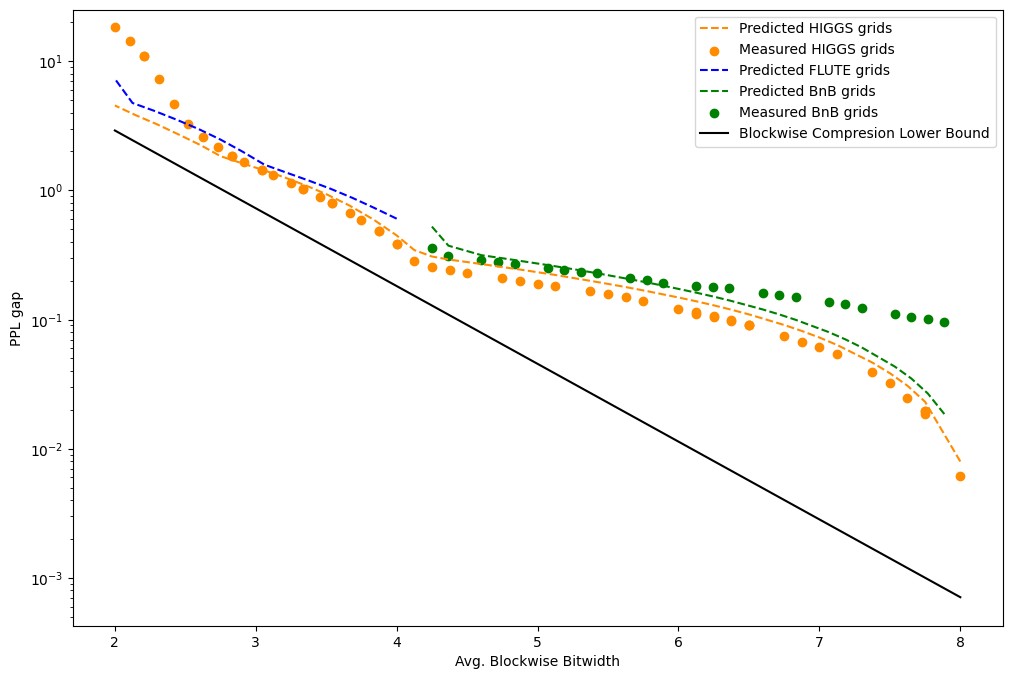

In [64]:
def get_expected_ppl_gap(slopes, grid_mses, selection):
    return (grid_mses[selection] * slopes).sum()

def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

# ANY
temp_ppl_gaps = []
temp_bitwidths = []
for indices in any_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in good_grids_with_mse]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in good_grids_with_mse]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], color="gray", linestyle="--", label=f"Predicted any grids")

# HIGGS
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="darkorange", label=f"Predicted HIGGS grids")

plt.scatter(
    higgs_bitwisths,
    higgs_ppls - np.min(rtn_ppls),
    color="darkorange", marker="o", label="Measured HIGGS grids"
)

# plt.scatter(
#     [8/4, 8/3, 8/2],
#     np.asarray([300.50626, 10.31264, 6.03953]) - np.min(rtn_ppls),
#     color="orange", marker="*", label="Measured constant bpw HIGGS grids"
# )

# FLUTE
temp_ppl_gaps = []
temp_bitwidths = []
for indices in flute_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in flute_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in flute_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="blue", label=f"Predicted FLUTE grids")

# QuIP#
temp_ppl_gaps = []
temp_bitwidths = []
for indices in quip_sharp_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in quip_sharp_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in quip_sharp_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="blue", label=f"Predicted QuIP# grids")

# BnB
temp_ppl_gaps = []
temp_bitwidths = []
for indices in bnb_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="green", label=f"Predicted BnB grids")

plt.scatter(
    bnb_bitwidths,
    bnb_ppls - np.min(rtn_ppls),
    color="green", marker="o", label="Measured BnB grids"
)


# FLUTE+BnB
temp_ppl_gaps = []
temp_bitwidths = []
for indices in combo_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in combo_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in combo_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
# plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", label=f"Predicted FLUTE+BnB grids")

plt.plot(
    np.linspace(2, 8),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 8)],
    color="black", label="Blockwise Compresion Lower Bound",
)

plt.xlabel("Avg. Blockwise Bitwidth")
plt.ylabel("PPL gap")

plt.yscale('log')
plt.ylim(None, 25)

# plt.ylim(0, 1)

plt.legend()

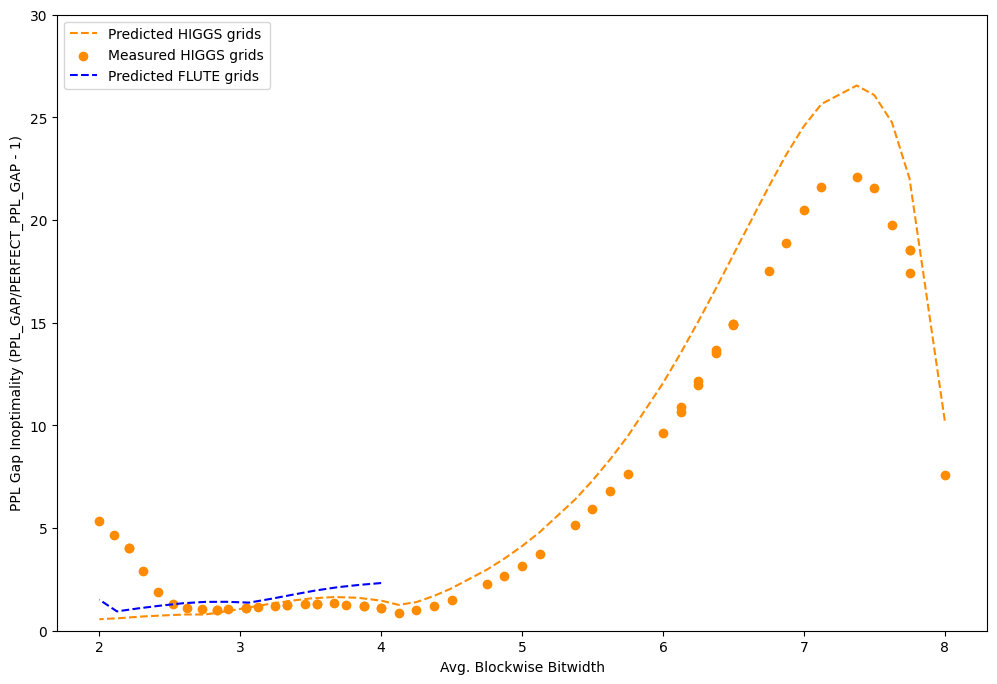

In [24]:
def get_expected_ppl_gap(slopes, grid_mses, selection):
    return (grid_mses[selection] * slopes).sum()

def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

# HIGGS
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)

base_ppl_gaps = np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in temp_bitwidths[order]])
plt.plot(
    temp_bitwidths[order],
    temp_ppl_gaps[order] / base_ppl_gaps - 1,
    linestyle="--", color="darkorange", label=f"Predicted HIGGS grids"
)

base_ppl_gaps = np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in higgs_bitwisths])
plt.scatter(
    higgs_bitwisths,
    (higgs_ppls - np.min(rtn_ppls)) / base_ppl_gaps - 1,
    color="darkorange", marker="o", label="Measured HIGGS grids"
)

# FLUTE
temp_ppl_gaps = []
temp_bitwidths = []
for indices in flute_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in flute_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in flute_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)

base_ppl_gaps = np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in temp_bitwidths[order]])
plt.plot(
    temp_bitwidths[order],
    temp_ppl_gaps[order] / base_ppl_gaps - 1,
    linestyle="--", color="blue", label=f"Predicted FLUTE grids"
)

plt.xlabel("Avg. Blockwise Bitwidth")
plt.ylabel("PPL Gap Inoptimality (PPL_GAP/PERFECT_PPL_GAP - 1)")

plt.ylim(0.0, 30)

plt.legend()

In [25]:
import subprocess

chosen_grids = higgs_grids
chosen_configurations = higgs_configurations

for indices in tqdm(chosen_configurations):
    bitwidth = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in chosen_grids]),
        np.asarray(indices),
    )
    
    if indices in measured_higgs_configs:
        print(f"Skipping {bitwidth:.2f}")
        continue
    
    if bitwidth <= 4.0:
        print(f"Skipping {bitwidth:.2f}")
        continue
    
    blockwise_string = f"""[{
        ','.join(['('+ str(chosen_grids[i]['edenn_d']) + ',' + str(chosen_grids[i]['edenn_n']) + ')' for i in indices])
    }]"""
    
    # subprocess.check_call(
    #     f"CUDA_VISIBLE_DEVICES=6 python eval_real_quant.py meta-llama/Meta-Llama-3.1-8B --blockwise '{blockwise_string}' --multiquant-ckpt-path /nfs/scistore19/alistgrp/apanfero/models/higgs/Meta-Llama-3.1-8B.pt",
    #     shell=True,
    #     cwd="../kernels",
    # )

  0%|          | 0/40 [00:00<?, ?it/s]

Skipping 5.50
Skipping 2.61
Skipping 3.04
Skipping 4.38
Skipping 5.00
Skipping 6.50
Skipping 6.25
Skipping 4.25
Skipping 2.75
Skipping 6.00
Skipping 6.38
Skipping 5.38
Skipping 7.38
Skipping 4.88
Skipping 7.12
Skipping 7.62
Skipping 2.46
Skipping 3.67
Skipping 2.92
Skipping 4.00
Skipping 2.00
Skipping 7.75
Skipping 3.83
Skipping 6.88
Skipping 8.00
Skipping 3.21
Skipping 6.12
Skipping 3.38
Skipping 2.15
Skipping 4.75
Skipping 2.30
Skipping 7.00
Skipping 3.50
Skipping 4.12
Skipping 6.75
Skipping 5.12
Skipping 7.50
Skipping 5.62
Skipping 4.50
Skipping 5.75


In [26]:
import subprocess


for indices in tqdm(bnb_configurations):
    bitwidth = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in bnb_grids]),
        np.asarray(indices),
    )
    
    if indices in measured_bnb_configs:
        print(f"Skipping {bitwidth:.2f}")
        continue
    
    blockwise_string = f"""[{
        ','.join(['"'+ bnb_grids[i]['name'] + '"' for i in indices])
    }]"""
    
    # subprocess.check_call(
    #     f"CUDA_VISIBLE_DEVICES=6 python eval_bnb.py meta-llama/Meta-Llama-3.1-8B --blockwise '{blockwise_string}'",
    #     shell=True,
    #     cwd="../bnb",
    # )

  0%|          | 0/25 [00:00<?, ?it/s]

Skipping 5.66
Skipping 6.71
Skipping 4.60
Skipping 5.19
Skipping 6.60
Skipping 6.36
Skipping 6.13
Skipping 7.65
Skipping 7.89
Skipping 5.07
Skipping 7.18
Skipping 4.25
Skipping 5.42
Skipping 7.30
Skipping 7.77
Skipping 6.24
Skipping 7.07
Skipping 4.37
Skipping 6.83
Skipping 5.31
Skipping 4.84
Skipping 5.78
Skipping 4.72
Skipping 7.53
Skipping 5.89


In [27]:
def get_df_from_wandb(path):
    api = wandb.Api()

    # Project is specified by <entity/project-name>
    runs = api.runs(path)
    
    data_df_lines = []
    for run in tqdm(runs): 
        data_df_lines.append({
            'Name': run.name,
            'Commit': run.commit,
            **run.summary._json_dict,
            **{k: v for k,v in run.config.items() if not k.startswith('_')},
        })
    data_df = pd.DataFrame(data_df_lines)
    return data_df

In [37]:
data_df

,Unnamed: 0,layer,mse,wikitext2
0,30376,model.layers.3.mlp.down_proj,0.000290,5.606261
1,30378,model.layers.10.self_attn.o_proj,0.002426,5.607512
2,30385,model.layers.10.mlp.up_proj,0.003430,5.610016
3,30387,model.layers.17.self_attn.o_proj,0.000015,5.608764
4,30388,model.layers.26.mlp.up_proj,0.162105,5.645189
...,...,...,...,...
34522,64964,model.layers.0.mlp.gate_proj,1.000000,5.721302
34523,64965,model.layers.0.self_attn.o_proj,1.000000,5.816591
34524,64966,model.layers.0.self_attn.v_proj,1.000000,11.544456
34525,64967,model.layers.0.self_attn.k_proj,1.000000,5.617535


In [53]:
# BASE_PPL = np.min(noisy_ppls)
BASE_PPL = 5.606692790985107

# data_df = get_df_from_wandb('rock-and-roll/NOISY_MSE_ONE_LINEAR_LAYER_GALQIWI_PPL')
# data_df.to_csv("layerwise_slopes.csv")
data_df = pd.read_csv("layerwise_slopes.csv")

data_df['layer'] = data_df['layer_name']
data_df['mse'] = data_df['relative_mse']

data_df = data_df[data_df['base_model'] == MODEL]

data_df = data_df[['layer', 'mse', 'wikitext2']]
data_df = data_df.dropna().copy()

from sklearn.linear_model import LinearRegression

layers = sorted(set(data_df['layer']))

scale_by_layer = {}
intercept_by_layer = {}

for layer_idx, layer in enumerate(layers):
    to_fit = data_df[data_df['layer'] == layer]
    to_fit = to_fit[to_fit['mse'] < 4 ** -1.7]
    # to_fit = to_fit[to_fit['wikitext2'] < 5.640]

    slope = LinearRegression(fit_intercept=False).fit(to_fit['mse'].values.reshape(-1, 1), to_fit['wikitext2'] - BASE_PPL).coef_
    
    scale_by_layer[layer] = slope.item()
    intercept_by_layer[layer] = BASE_PPL

/tmp/ipykernel_1371959/448389430.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("layerwise_slopes.csv")


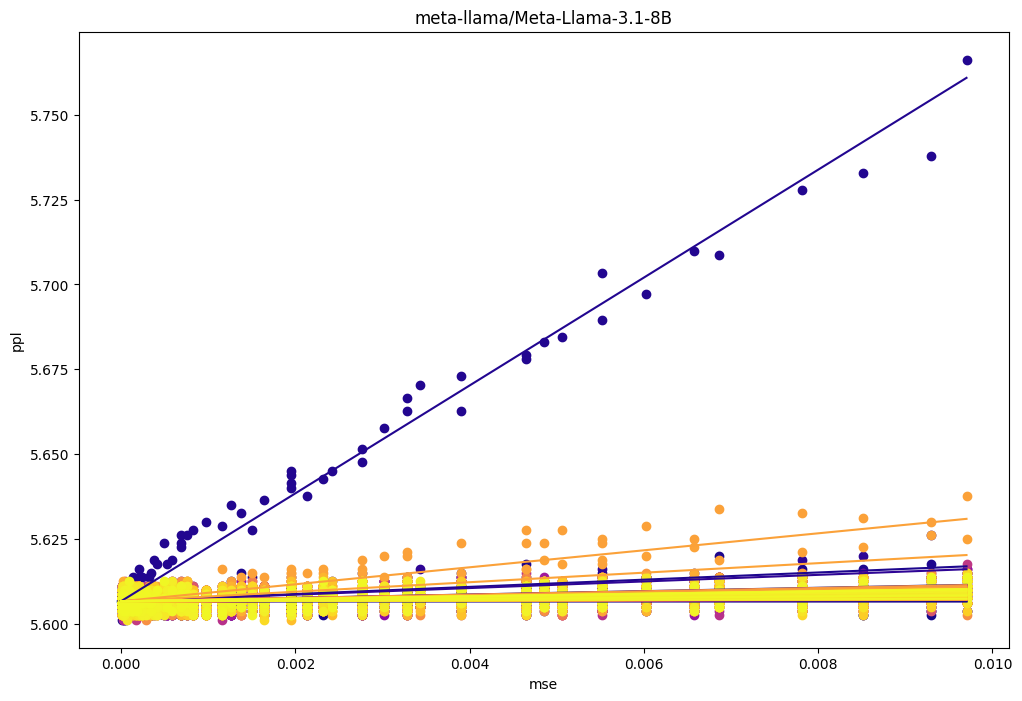

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


cmap = matplotlib.colormaps["plasma"]

plt.scatter([0.0], [5.606692790985107])

for layer_idx, layer in enumerate(layers):
# for layer_idx, layer in enumerate(layers):
    to_plot = data_df[data_df['layer'] == layer]
    to_plot = to_plot[to_plot['mse'] < 0.01]
    # to_plot = to_plot[to_plot['wikitext2'] < 5.640]
    
    plt.scatter(to_plot['mse'], to_plot['wikitext2'], color=cmap(layer_idx / len(layers)))

    grid = np.linspace(0, to_plot['mse'].max(), 10)
    
    plt.plot(grid, intercept_by_layer[layer] + grid * scale_by_layer[layer], color=cmap(layer_idx / len(layers)))


plt.title(f'{MODEL}')
plt.xlabel('mse')
plt.ylabel('ppl')
plt.savefig(f'ppl_mse.png')

In [55]:
total_params = 32 * (4096 * (2 * 4096 + 2 * 4096 * 8 / 32) + 3 * 4096 * 14336)

layerwise_weights = {}
for name in scale_by_layer:
    if "q_proj" in name or "o_proj" in name:
        layerwise_weights[name] = 4096 * 4096 / total_params
    elif "k_proj" in name or "v_proj" in name:
        layerwise_weights[name] = 4096 * 4096 * 8 / 32 / total_params
    else:
        layerwise_weights[name] = 4096 * 14336 / total_params

layerwise_slopes = np.asarray(list(scale_by_layer.values()))
layerwise_weights = np.asarray(list(layerwise_weights.values()))

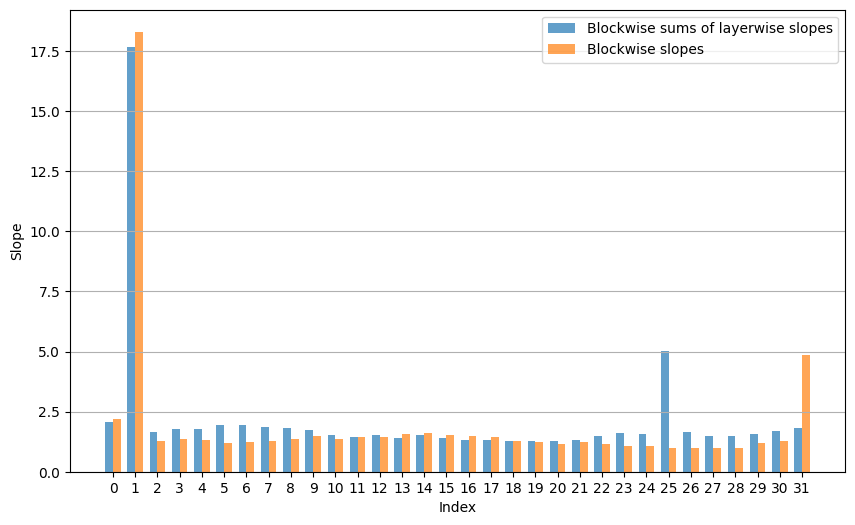

In [61]:
# Creating a bar plot for comparison
plt.figure(figsize=(10, 6))
index = np.arange(len(layerwise_slopes.reshape(32, -1).sum(axis=-1)))

bar_width = 0.35  # Width of the bars

# Plotting the bars
plt.bar(index, layerwise_slopes.reshape(32, -1).sum(axis=-1), bar_width, label='Blockwise sums of layerwise slopes', alpha=0.7)
plt.bar(index + bar_width, slopes, bar_width, label='Blockwise slopes', alpha=0.7)

# Adding titles and labels
plt.xlabel('Index')
plt.ylabel('Slope')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True, axis="y")
plt.xticks(index + bar_width / 2, index)  # Adjust the tick marks
plt.show()

In [41]:
cmap = mpl.colormaps["plasma"]

higgs_layerwise_configurations = set()
flute_layerwise_configurations = set()
bnb_layerwise_configurations = set()

for target_bitwidht in tqdm(np.linspace(2.0, 8.0, num=40), desc="Processing bitwidths..."):    
    # HIGGS
    girds_to_map_to = higgs_grids
    avg_bits, indices = find_grids_with_budget(layerwise_slopes, layerwise_weights, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    if tuple(indices) not in higgs_layerwise_configurations:
        higgs_layerwise_configurations.add(tuple(indices))
        
    # FLUTE
    if target_bitwidht <= 4:
        girds_to_map_to = flute_grids
        avg_bits, indices = find_grids_with_budget(layerwise_slopes, layerwise_weights, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in flute_layerwise_configurations:
            flute_layerwise_configurations.add(tuple(indices))
    
    # BnB
    if target_bitwidht >= 4.25:
        girds_to_map_to = bnb_grids
        avg_bits, indices = find_grids_with_budget(layerwise_slopes, layerwise_weights, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
        if tuple(indices) not in bnb_layerwise_configurations:
            bnb_layerwise_configurations.add(tuple(indices))


Processing bitwidths...:   0%|          | 0/40 [00:00<?, ?it/s]

In [42]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/higgs-evals-layerwise")

# Placeholder for confusion matrix values
higgs_layerwise_ppls, higgs_layerwise_configs = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    ppl = run.summary.get("wikitext2_PPL")
    higgs_config = run.config.get("layerwise")
    
    # print(f"{model=} {mse=} {ppl=}")
    if ppl is not None and higgs_config is not None and model == MODEL:
        higgs_layerwise_ppls.append(ppl)
        higgs_layerwise_configs.append(list(higgs_config.values()))
        
higgs_layerwise_ppls = np.asarray(higgs_layerwise_ppls)
higgs_layerwise_configs = np.asarray(higgs_layerwise_configs)

higgs_layerwise_bitwisths = ((np.log2(higgs_layerwise_configs[:,:,1]) / higgs_layerwise_configs[:,:,0]) * layerwise_weights).sum(axis=-1)

measured_higgs_layerwise_configs = set()

for measured_config in higgs_layerwise_configs:
    mapped_config = []
    for block in measured_config:
        for i, grid in enumerate(higgs_grids):
            if grid["edenn_d"] == int(block[0]) and grid["edenn_n"] == int(block[1]):
                mapped_config.append(i)
                break
        else:
            raise Exception(f"Coudn't map grid {block}!")
        
    measured_higgs_layerwise_configs.add(tuple(mapped_config))


/tmp/ipykernel_1371959/1352388857.py:5: RuntimeWarning: invalid value encountered in log2
  bitwidhts = np.log2(slopes) / 2


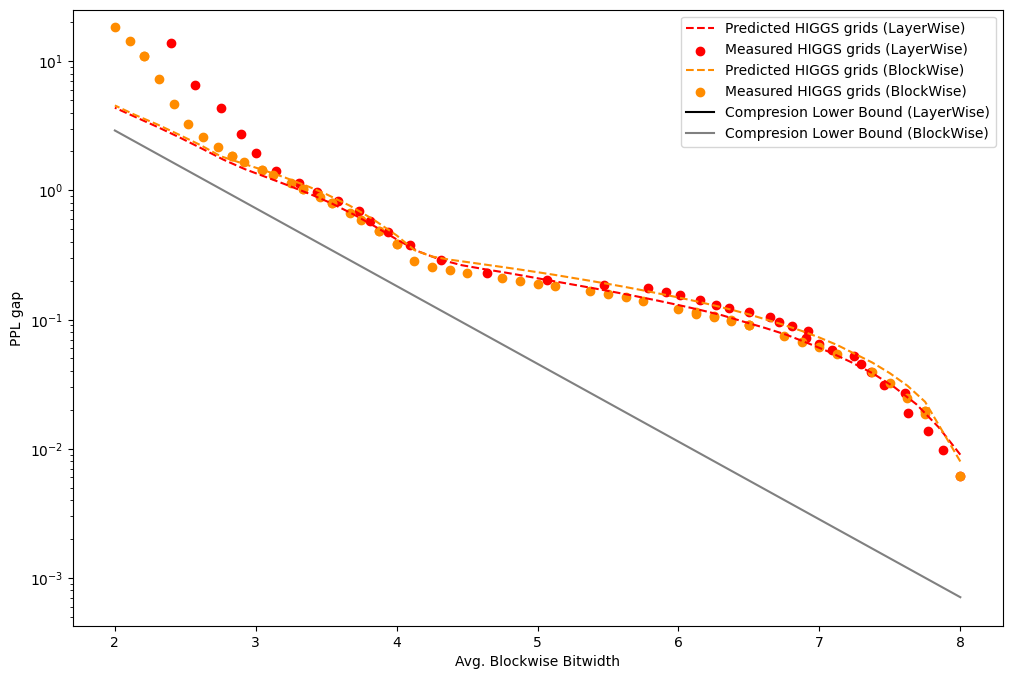

In [60]:
def get_expected_ppl_gap(slopes, grid_mses, selection):
    return (grid_mses[selection] * slopes).sum()

def get_bitwidth(weights, grid_bits, selection):
    return (weights * grid_bits[selection]).sum()

# HIGGS
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_layerwise_configurations:
    ppl_gap = get_expected_ppl_gap(
        layerwise_slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        layerwise_weights,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="red", label=f"Predicted HIGGS grids (LayerWise)")

plt.scatter(
    higgs_layerwise_bitwisths,
    higgs_layerwise_ppls - np.min(rtn_ppls),
    color="red", marker="o", label="Measured HIGGS grids (LayerWise)"
)


# HIGGS Blockwise
temp_ppl_gaps = []
temp_bitwidths = []
for indices in higgs_configurations:
    ppl_gap = get_expected_ppl_gap(
        slopes,
        np.asarray([grid["mse"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    bitwidht = get_bitwidth(
        np.ones((32,)) / 32,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    temp_ppl_gaps.append(ppl_gap)
    temp_bitwidths.append(bitwidht)
temp_ppl_gaps = np.asarray(temp_ppl_gaps)
temp_bitwidths = np.asarray(temp_bitwidths)
order = np.argsort(temp_ppl_gaps)
plt.plot(temp_bitwidths[order], temp_ppl_gaps[order], linestyle="--", color="darkorange", label=f"Predicted HIGGS grids (BlockWise)")

plt.scatter(
    higgs_bitwisths,
    higgs_ppls - np.min(rtn_ppls),
    color="darkorange", marker="o", label="Measured HIGGS grids (BlockWise)"
)


# Lower Bound

plt.plot(
    np.linspace(2, 8),
    [expected_ppl_gap(layerwise_slopes, get_optimal_blockwise_bitwidths(layerwise_slopes, bpw)) for bpw in np.linspace(2, 8)],
    color="black", label="Compresion Lower Bound (LayerWise)",
)

plt.plot(
    np.linspace(2, 8),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 8)],
    color="gray", label="Compresion Lower Bound (BlockWise)",
)

plt.xlabel("Avg. Blockwise Bitwidth")
plt.ylabel("PPL gap")

plt.yscale('log')
plt.ylim(None, 25)

# plt.ylim(0, 1)

plt.legend()

In [90]:
import subprocess

for indices in tqdm(higgs_layerwise_configurations):    
    bitwidth = get_bitwidth(
        layerwise_weights,
        np.asarray([grid["bits"] for grid in higgs_grids]),
        np.asarray(indices),
    )
    
    if indices in measured_higgs_layerwise_configs:
        print(f"Skipping {bitwidth}")
    
    layerwise_string = "{" + f"""{
        ','.join(['"' + name + '":('+ str(higgs_grids[i]['edenn_d']) + ',' + str(higgs_grids[i]['edenn_n']) + ')' for name, i in zip(scale_by_layer.keys(), indices)])
    }""" + "}"
    
    # subprocess.check_call(
    #     f"CUDA_VISIBLE_DEVICES=7 python eval_real_quant.py meta-llama/Meta-Llama-3.1-8B --layerwise '{layerwise_string}' --multiquant-ckpt-path /nfs/scistore19/alistgrp/apanfero/models/higgs/Meta-Llama-3.1-8B.pt",
    #     shell=True,
    #     cwd="../kernels",
    # )


  0%|          | 0/40 [00:00<?, ?it/s]

Skipping 7.999999999999998
